# SAR introduction
## How does SAR work?
SAR is a Radar: a beam of energy is emitted from an antenna. As they strike objects the energy is scattered in all directions with some of the energy reflected directly back to the radar. 

Synthetic Aperture Radar: uses the motion of the radar antenna over a target region to provide finer spatial resolution than conventional beam-scanning radars.

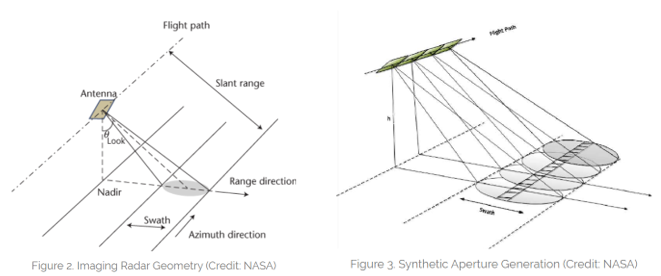

Images are not very intuitive because we are not used to see them. They have geometric distortions and the pixel value is completely different to what we see with our eyes (or with optical sensors).

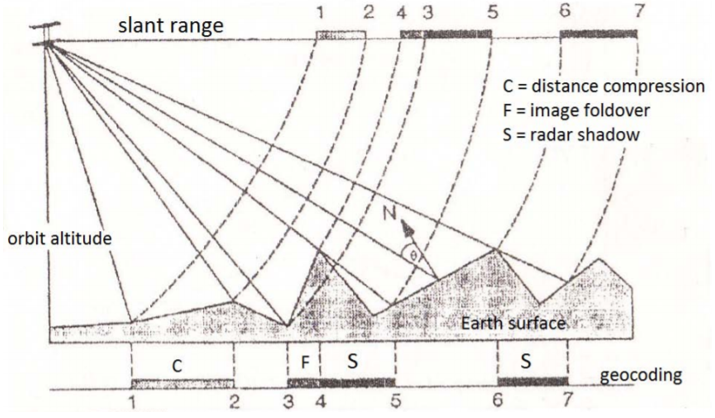

The pixel values are proportional to the amount of energy received and it depends on the amount of energy the SAR sensor transmitted, the properties and shape of the object and the angle from which the object is viewed.

## SAR image interpretation

* Water: Regions of calm water and other smooth surfaces appear black (the radar reflects away from the spacecraft)
* Surfaces: Rough surfaces appear brighter, as they reflect the radar in all directions, and more of the energy is scattered back to the antenna
* Slopes: Hills and other large-scale surface variations tend to appear bright on one side and dim on the other. (The side that appears bright was facing the SAR.) Where slopes are very steep, the dim side may be completely dark because no radar signal is returned at all. This is called shadow. Slope-influenced brightness is corrected by doing radiometric correction.
* Man-Made Structures: Due to the reflectivity and angular structure of buildings, bridges, and other human-made objects, these targets tend to behave as corner reflectors and show up as bright spots in a synthetic aperture radar (SAR) image.


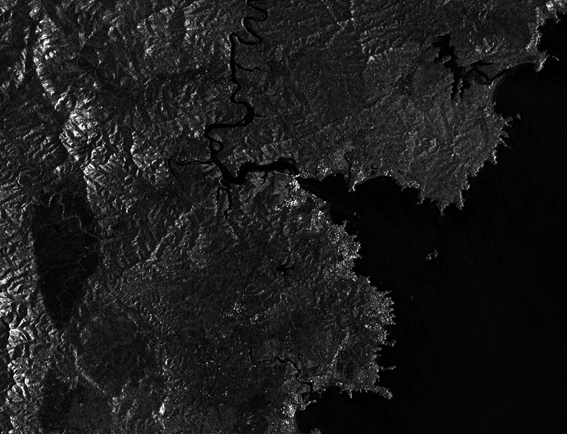

In [4]:
!/opt/anaconda/envs/env_better/bin/pip3 install sklearn

     |████████████████████████████████| 6.8 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 56.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=4452864227f83857ab7e706cd5584a2fae280c8d42f696506000fca913a55248
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from helpers import *

### Example of a city 

Cities have a high backscatter. Depending on the image preprocessing, pixels can be saturated.

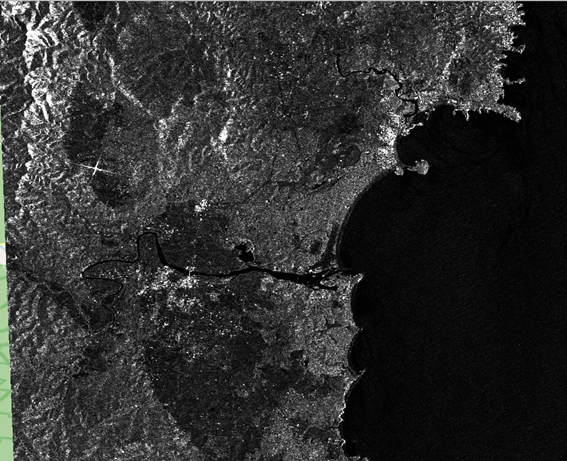

Buildings-> High backscatter

Roads-> Low backscatter


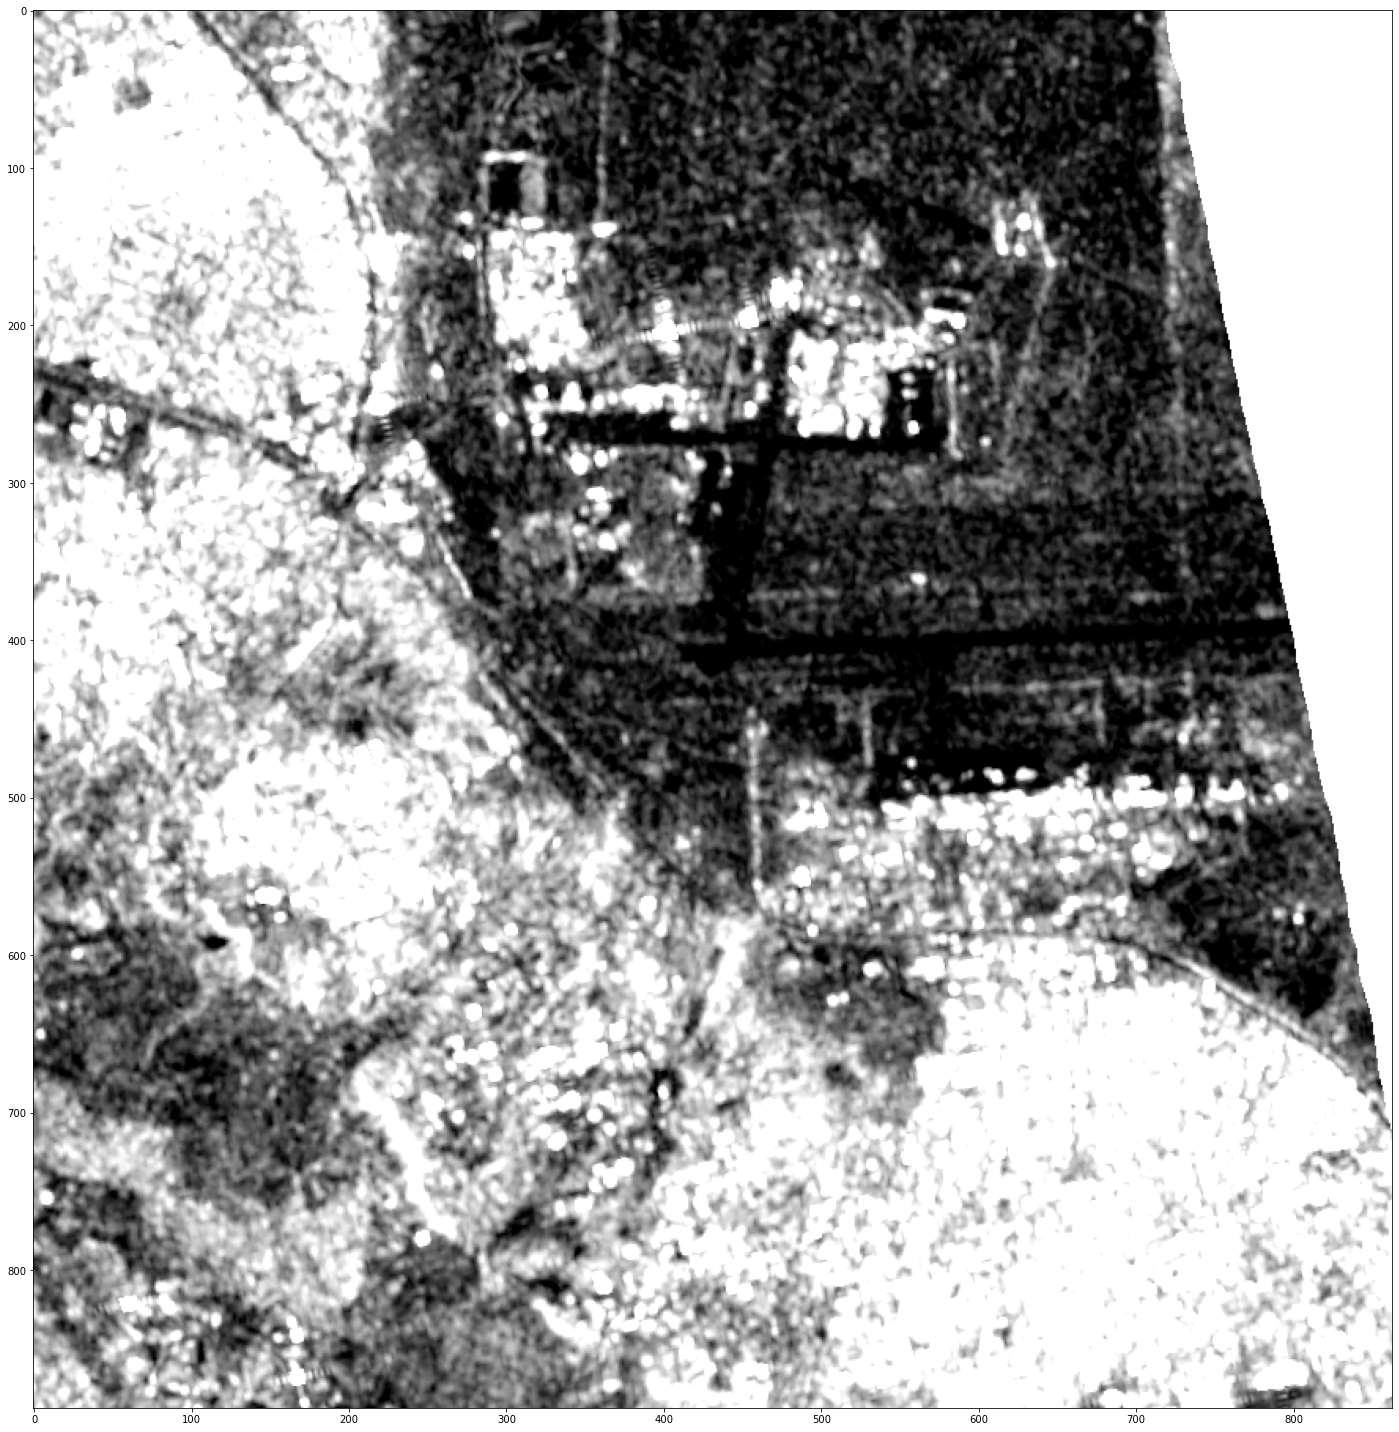

In [6]:
img_data1=load_image('data/backscatterNiamey20180130.tif')
plot_bands_row(img_data1,vmin=0,vmax=255)

### Example of an island - CharPiya

Islands are very easy to identify because of the very low backscatter of the ocean (depens also on meteorological conditions).


/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/charpiya/Subset_S1A_IW_GRDH_1SDV_20171220T120344_20171220T120409_019786_021A70_F200_NR_Orb_Cal_Spk_TC.tif


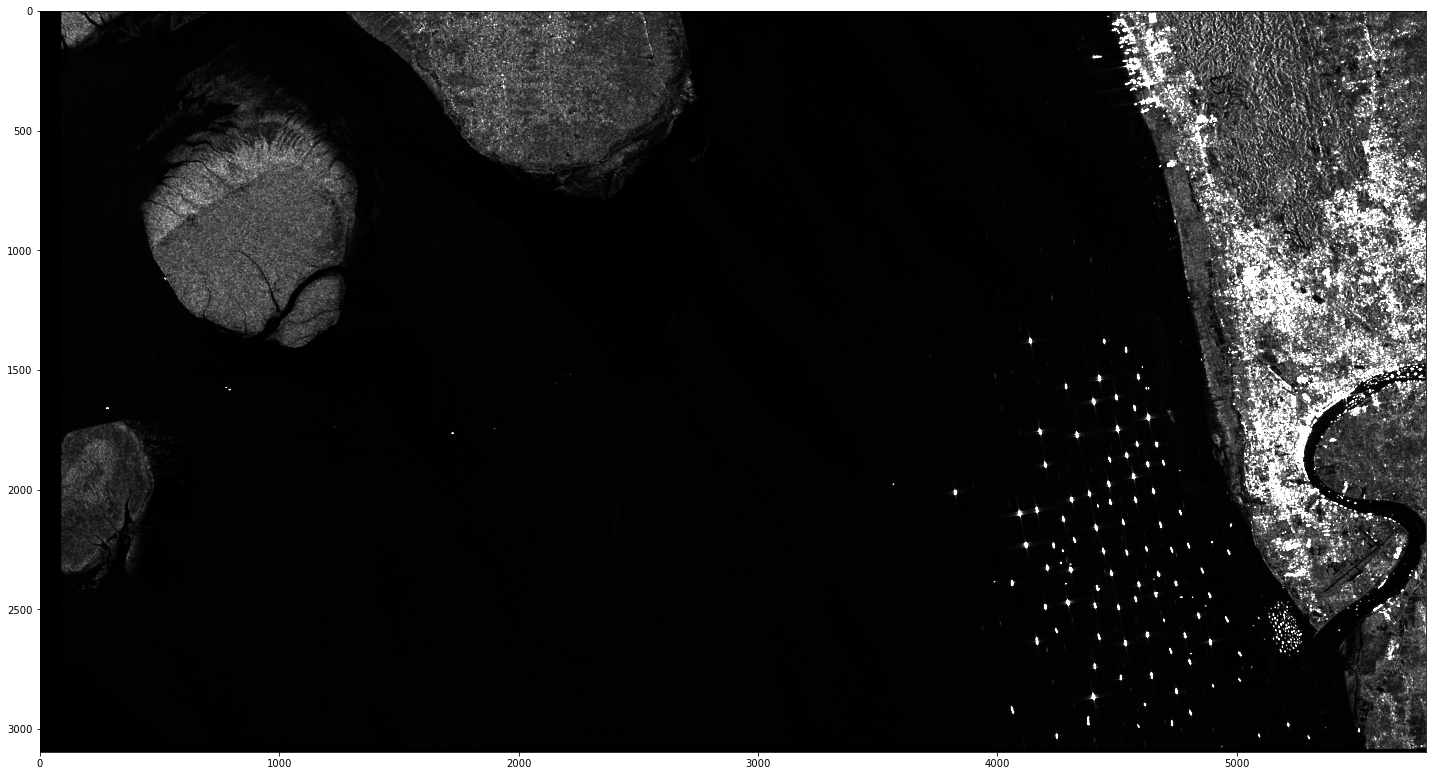

In [9]:
charpiya1= 'https://store.terradue.com/nextgeoss-change-detection-s1/charpiya/Subset_S1A_IW_GRDH_1SDV_20171220T120344_20171220T120409_019786_021A70_F200_NR_Orb_Cal_Spk_TC.tif'
aoi_bbox = '91.32,22.18,91.84,22.458'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
img_data1 = vsi_download(charpiya1, aoi)
plot_bands_row(img_data1,vmin=0,vmax=0.5)

## Pixel values

In the two previous examples, the pixel values are very different. In Niamey the values are integers between 0 adn 255 while in Charpiya are float mainly between 0 and 0.5.

This is because of the preprocessing of the images. The original values of a downloaded S1 image are floats. Usually a common preprocessing is done (i.e. Apply Orbit File, Calibration, Terrain Correction...) but the final step depends on what we want to do with the data. Some people keep the float calibrated values but others prefer to convert them to a byte in order to save space and to visualize them easily. Each approach has advantages and disadvantages, it depends on what the data is going to be used for.

There are different methods for converting the data and some decisions have to be made:
* What are the minimum and maximum values that we want to be represented?
* Do we need to be able to recover the original value?
* Do we want to assign the min or max value of the new range to the data out of the range?
* Which is the accuracy required?

### Advantages disadvantages of datatype of pixel values
* Advantages of using byte
 * Less space required
 * Faster for remote access
 * Easier for visualizing for most software
* Disadvantages
 * Less accuracy
 * Sometimes the real values are lost
 * Depending on the conversion, no possibility to compare different images
 
## Proposed exercise: 
* Is it possible to recover original values from Niamey image?
* Convert to byte the pixels of CharPiya.

## S1 preprocessing

There are two types of Level-1 S1 products (https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar/product-types-processing-levels/level-1):

* SLC: Single Look Complex. Geo-referenced using orbit and attitude data from the satellite, and provided in slant-range geometry
* GRD: Ground Range Detected. multi-looked and projected to ground range using the Earth ellipsoid model WGS84. Phase information is lost

Depending on the final application, one of both has to be selected and preprocessed.


A typical processing chain for S1 GRD is the following. Usually it is used when no phase information is required.
(https://www.mdpi.com/2504-3900/18/1/11/pdf)
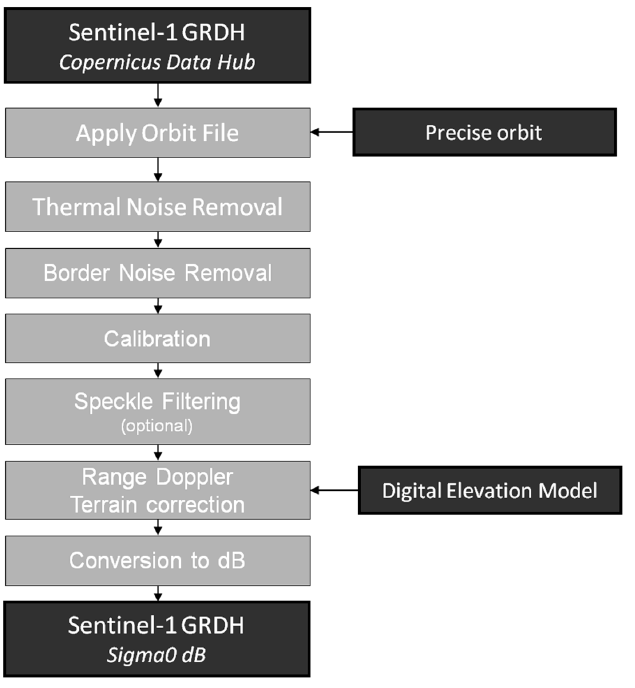


SLC images are used when phase is important. For example when working with the coherence. 

Usually, for the preprocessing of both types of products it is used SNAP (https://step.esa.int/main/toolboxes/snap/). 

The conversion of the pixel values commented above is the latest part of the processing.

## Optical vs SAR summary:

| Attribute   |      Optical      |  Radar |
|----------|:-------------:|------:|
| Source of energy |  Sun. Passive collection of relfected optical light | Active Sensor. Collection of reflected microwave energy |
| Typical spatial resolution |    Good   |  Fair/Poor |
| Affected by weather | Yes. Clouds, haze, low light |    No. Able to penetrate clouds |
| Day/Night | Day Only |    Day/Night |
| Interpretation | Familiar View |    Requires specialization and knowledge |

## Some conclusions

In this and the previous notebook we have seen how to search the input data, how to download, how to preprocess it...

This requires a lot of effort from the final user.

For example, SatCen is not interested in this preprocessing or in the proper selection of the inputs to be able to compute a good coherence image between two dates. SatCen is interested and has the expertise in the final applications: in extracting information from these inputs:
* How is affecting a flooding to the security
* What changes in a critical infrastructure could create security issues
* ...

With BETTER and the challenges proposed by SatCen, now we can focus in the final analysis without putting effort in the preparation of the data.

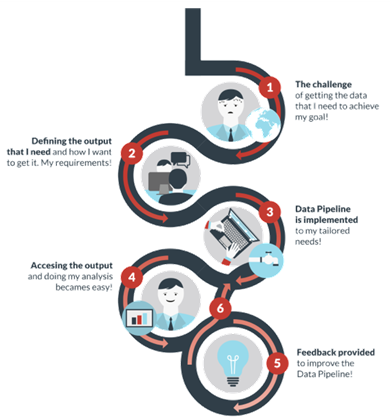

## Let's start now to really exploit the data!